In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 7
dim = 30
numRuns = 51
pop_size = 300
percMaxEvals = 0.4
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[7_30_51_300_0.4_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[7_30_51_300_0.4_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	701.7175

Best Fitness:	701.3610
Solution:	700.0000
Diff:		1.3610

[0:16:17][----------] 1.96% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	702.1200

Best Fitness:	701.6176
Solution:	700.0000
Diff:		1.6176

[0:30:52][----------] 3.92% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	702.1273

Best Fitness:	701.6431
Solution:	700.0000
Diff:		1.6431

[0:45:15][#---------] 5.88% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	701.7735

Best Fitness:	701.3763
Solution:	700.0000
Diff:		1.3763

[0:59:30][#---------] 7.84% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	701.3599

Best Fitness:	701.2013
Solution:	700.0000
Diff:		1.2013

[1:13:40][#---------] 9.80% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	701.3832

Best Fitness:	701.1978
Solution:	700.0000
Diff:		1.1978

[1:27:51][#---------] 11.76% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	701.5584

Best Fitness:	701.2679
Solution:	700.0000
Diff:		1.2679

[1:42:02][#---------] 13.73% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	701.6199

Best Fitness:	701.3369
Solution:	700.0000
Diff:		1.3369

[1:56:16][##--------] 15.69% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	701.9199

Best Fitness:	701.3306
Solution:	700.0000
Diff:		1.3306

[2:10:06][##--------] 17.65% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	701.2351

Best Fitness:	701.1023
Solution:	700.0000
Diff:		1.1023

[2:24:25][##--------] 19.61% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	701.4858

Best Fitness:	701.2345
Solution:	700.0000
Diff:		1.2345

[2:38:29][##--------] 21.57% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	701.5023

Best Fitness:	701.2570
Solution:	700.0000
Diff:		1.2570

[2:51:26][##--------] 23.53% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	701.8908

Best Fitness:	701.4168
Solution:	700.0000
Diff:		1.4168

[3:03:43][###-------] 25.49% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	701.7790

Best Fitness:	701.3769
Solution:	700.0000
Diff:		1.3769

[3:16:22][###-------] 27.45% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	701.5506

Best Fitness:	701.2961
Solution:	700.0000
Diff:		1.2961

[3:28:36][###-------] 29.41% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	701.2971

Best Fitness:	701.1650
Solution:	700.0000
Diff:		1.1650

[3:40:55][###-------] 31.37% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	701.4006

Best Fitness:	701.1962
Solution:	700.0000
Diff:		1.1962

[3:53:41][###-------] 33.33% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	701.4388

Best Fitness:	701.2229
Solution:	700.0000
Diff:		1.2229

[4:06:39][####------] 35.29% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	701.8222

Best Fitness:	701.4474
Solution:	700.0000
Diff:		1.4474

[4:19:13][####------] 37.25% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	701.6675

Best Fitness:	701.3617
Solution:	700.0000
Diff:		1.3617

[4:31:45][####------] 39.22% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	701.3677

Best Fitness:	701.2062
Solution:	700.0000
Diff:		1.2062

[4:44:18][####------] 41.18% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	701.6390

Best Fitness:	701.3494
Solution:	700.0000
Diff:		1.3494

[4:56:53][####------] 43.14% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	701.7013

Best Fitness:	701.3314
Solution:	700.0000
Diff:		1.3314

[5:09:35][#####-----] 45.10% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	701.4439

Best Fitness:	701.1919
Solution:	700.0000
Diff:		1.1919

[5:21:54][#####-----] 47.06% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	701.5856

Best Fitness:	701.2800
Solution:	700.0000
Diff:		1.2800

[5:34:12][#####-----] 49.02% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	701.2454

Best Fitness:	701.1216
Solution:	700.0000
Diff:		1.1216

[5:46:07][#####-----] 50.98% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	701.6442

Best Fitness:	701.3188
Solution:	700.0000
Diff:		1.3188

[5:57:21][#####-----] 52.94% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	701.5242

Best Fitness:	701.2312
Solution:	700.0000
Diff:		1.2312

[6:08:22][#####-----] 54.90% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	701.4990

Best Fitness:	701.2807
Solution:	700.0000
Diff:		1.2807

[6:19:29][######----] 56.86% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	701.5129

Best Fitness:	701.2638
Solution:	700.0000
Diff:		1.2638

[6:30:11][######----] 58.82% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	701.5803

Best Fitness:	701.3626
Solution:	700.0000
Diff:		1.3626

[6:41:26][######----] 60.78% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	701.9843

Best Fitness:	701.5744
Solution:	700.0000
Diff:		1.5744

[6:52:15][######----] 62.75% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	701.6598

Best Fitness:	701.3674
Solution:	700.0000
Diff:		1.3674

[7:03:11][######----] 64.71% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	701.5544

Best Fitness:	701.3202
Solution:	700.0000
Diff:		1.3202

[7:14:34][#######---] 66.67% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	701.6600

Best Fitness:	701.3303
Solution:	700.0000
Diff:		1.3303

[7:25:27][#######---] 68.63% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	701.9869

Best Fitness:	701.5120
Solution:	700.0000
Diff:		1.5120

[7:36:50][#######---] 70.59% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	701.5098

Best Fitness:	701.2544
Solution:	700.0000
Diff:		1.2544

[7:47:55][#######---] 72.55% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	701.4474

Best Fitness:	701.2481
Solution:	700.0000
Diff:		1.2481

[7:58:42][#######---] 74.51% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	701.4860

Best Fitness:	701.2428
Solution:	700.0000
Diff:		1.2428

[8:09:20][########--] 76.47% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	701.6113

Best Fitness:	701.3082
Solution:	700.0000
Diff:		1.3082

[8:20:09][########--] 78.43% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	701.6123

Best Fitness:	701.2717
Solution:	700.0000
Diff:		1.2717

[8:30:13][########--] 80.39% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	701.5938

Best Fitness:	701.2627
Solution:	700.0000
Diff:		1.2627

[8:39:57][########--] 82.35% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	701.6678

Best Fitness:	701.2648
Solution:	700.0000
Diff:		1.2648

[8:49:47][########--] 84.31% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	701.7292

Best Fitness:	701.3143
Solution:	700.0000
Diff:		1.3143

[8:59:29][#########-] 86.27% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	701.7098

Best Fitness:	701.2927
Solution:	700.0000
Diff:		1.2927

[9:09:21][#########-] 88.24% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	701.9188

Best Fitness:	701.3916
Solution:	700.0000
Diff:		1.3916

[9:18:51][#########-] 90.20% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	701.7996

Best Fitness:	701.4497
Solution:	700.0000
Diff:		1.4497

[9:28:51][#########-] 92.16% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	701.3627

Best Fitness:	701.1708
Solution:	700.0000
Diff:		1.1708

[9:38:40][#########-] 94.12% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	701.9578

Best Fitness:	701.4174
Solution:	700.0000
Diff:		1.4174

[9:48:38][##########] 96.08% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	701.5372

Best Fitness:	701.2790
Solution:	700.0000
Diff:		1.2790

[9:58:25][##########] 98.04% 

Optimization ended due to max fitness evals (max = 120000.0, curr = 119700)


#Generations:	397

#FitnessEvals:	119700

Mean Fitness:	701.4506

Best Fitness:	701.1786
Solution:	700.0000
Diff:		1.1786

[10:08:35][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

10:08:35

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
392,1.531598,1.436655,1.642891,1.441134,1.540683,1.675986,1.379026,1.57939,1.502661,1.404328,...,1.516789,1.491009,1.36044,1.304037,1.440153,1.545578,1.529278,1.519357,1.451155,50
393,1.531598,1.436655,1.642891,1.441134,1.540683,1.675986,1.379026,1.57939,1.502661,1.404328,...,1.516789,1.472049,1.36044,1.304037,1.440153,1.545578,1.529278,1.483769,1.451155,50
394,1.453477,1.436655,1.642891,1.441134,1.540683,1.675986,1.379026,1.57939,1.502661,1.404328,...,1.516789,1.472049,1.36044,1.304037,1.440153,1.545578,1.529278,1.483769,1.451155,50
395,1.453477,1.436655,1.630579,1.441134,1.463876,1.560202,1.379026,1.57939,1.502661,1.404328,...,1.516789,1.472049,1.36044,1.304037,1.440153,1.545578,1.529278,1.483769,1.451155,50
396,1.453477,1.436655,1.630579,1.441134,1.463876,1.560202,1.281932,1.57939,1.502661,1.381086,...,1.261713,1.472049,1.36044,1.304037,1.440153,1.545578,1.529278,1.483769,1.451155,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 1.3609975223672564

Best error for run 1: 1.61764774509777

Best error for run 2: 1.6431006210283385

Best error for run 3: 1.3763366497394145

Best error for run 4: 1.201339825197465

Best error for run 5: 1.1977970320424447

Best error for run 6: 1.267926986715338

Best error for run 7: 1.336895148086228

Best error for run 8: 1.3306481272784367

Best error for run 9: 1.1022538906210002

Best error for run 10: 1.2345444677947626

Best error for run 11: 1.2569788002496125

Best error for run 12: 1.4167807564535906

Best error for run 13: 1.3769006579385632

Best error for run 14: 1.2960935177966348

Best error for run 15: 1.165003723236964

Best error for run 16: 1.1961716081081022

Best error for run 17: 1.2229077032886835

Best error for run 18: 1.4473817445741588

Best error for run 19: 1.3617186468879936

Best error for run 20: 1.2062064015200349

Best error for run 21: 1.3494088105886703

Best error for run 22: 1.3313701733368362

Best error for run 23: 1.1919069874780917

Best error for run 24: 1.2800158106493882

Best error for run 25: 1.1216154652621526

Best error for run 26: 1.3187938383092614

Best error for run 27: 1.2312088990526036

Best error for run 28: 1.2806706641878236

Best error for run 29: 1.2637767748000215

Best error for run 30: 1.3626334250099035

Best error for run 31: 1.5743714003641571

Best error for run 32: 1.3674409957579883

Best error for run 33: 1.320231363914786

Best error for run 34: 1.3302883933268959

Best error for run 35: 1.5119917028866894

Best error for run 36: 1.2543635152011348

Best error for run 37: 1.2480738821211617

Best error for run 38: 1.2427735831643076

Best error for run 39: 1.3082370206715268

Best error for run 40: 1.2716911473069104

Best error for run 41: 1.2626739591649994

Best error for run 42: 1.2648293729641864

Best error for run 43: 1.3143452141872558

Best error for run 44: 1.2927495972030556

Best error for run 45: 1.391586808422403

Best error for run 46: 1.4497260912412457

Best error for run 47: 1.1707738336975808

Best error for run 48: 1.4174013875068567

Best error for run 49: 1.2789734386666396

Best error for run 50: 1.1786475831536336

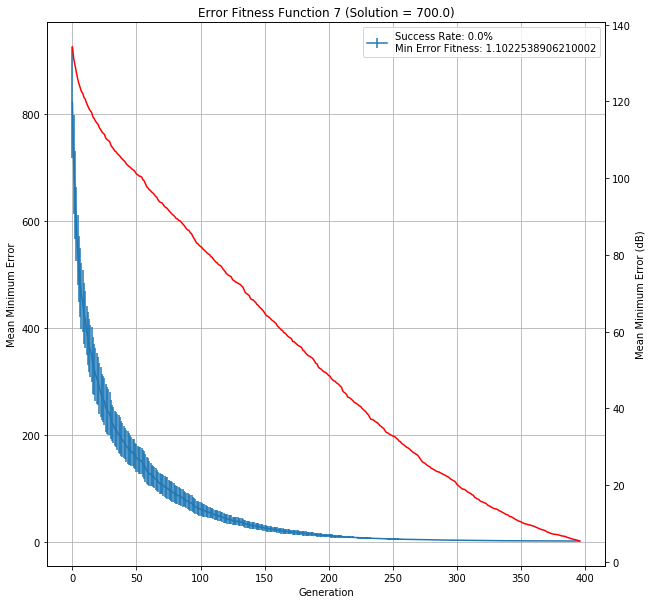

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[7_30_51_300_0.4_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,7,30,0.4,1.360998,1.617648,1.643101,1.376337,1.20134,1.197797,...,1.29275,1.391587,1.449726,1.170774,1.417401,1.278973,1.178648,1.309769,10:08:35,119700
